In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def getdaywanted(datewanted):

    from datetime import datetime
    import datetime as dt

    datestring = datewanted
    date = datetime.strptime(datestring, '%m/%d/%Y')
    year = date.year
    month = date.month
    day = date.day
    daywanted = (dt.date(year, month, day) - dt.date(year,1,1)).days + 1
    return daywanted

In [3]:
def getTESAdemand(daywanted):
    
    rows_to_keep = [0,daywanted]
    
    TESA_elec_demand = pd.read_csv('Data/TESA1718.csv', index_col='Date', skiprows = lambda x: x not in rows_to_keep)
    
    TESA_elec_demand = TESA_elec_demand.T
    
    return TESA_elec_demand

In [4]:
def getGAdemand(daywanted):

    rows_to_keep = [0,daywanted+1]

    GA_elec_demand = pd.read_csv('Data/CastleMillHousingArea_Elec_1617.csv', index_col='Date', skiprows = lambda x: x not in rows_to_keep)

    GA_elec_demand = GA_elec_demand.drop(['Meter Id','Site Code','Meter Reference'], axis = 1);
    
    GA_elec_demand = GA_elec_demand.T
    
    return GA_elec_demand

In [5]:
def getheatelecdemand():
    
    heat_demand = pd.read_csv('Data/simpleheatdemand.csv', index_col='Date')
    
    heat_demand = heat_demand.T
    
    return heat_demand

In [6]:
def gettotaldemand(daywanted):
    
    TESA = getTESAdemand(daywanted)
    
    GA = getGAdemand(daywanted)
    
    Heat = getheatelecdemand()
    
    bigdata =pd.concat([TESA, GA, Heat], axis=1)
    
    bigdata['Z'] = bigdata.sum(axis=1)
    
    bigdata.drop(bigdata.columns[[0, 1, 2]], axis = 1, inplace = True) 
    
    bigdata = bigdata.drop("00:00.1", axis=0)
    
    return bigdata

# input date wanted here

In [7]:
datewanted = "01/10/2020"
daywanted = getdaywanted(datewanted)
totaldemand = gettotaldemand(daywanted)

# input date wanted here

([<matplotlib.axis.XTick at 0x113fba6d0>,
 <a list of 5 Text xticklabel objects>)

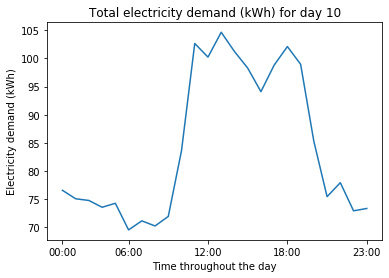

In [8]:
plt.plot(totaldemand)
plt.xlabel('Time throughout the day')
plt.ylabel('Electricity demand (kWh)')
plt.title('Total electricity demand (kWh) for day '+str(daywanted))
plt.xticks((0,5,11,17,23),('00:00','06:00','12:00','18:00','23:00'))

In [9]:
totaldemand

Date,Z
00:00,76.595
01:00,75.090
02:00,74.790
03:00,73.585
04:00,74.290
05:00,69.565
06:00,71.175
07:00,70.265
08:00,71.960
09:00,83.635
